In [21]:
import matplotlib.pyplot as plt
import numpy as np
import json
import datetime

In [143]:
policy = 'RR'
with open(f'YACS/master/log_master_{policy}.log') as f:
    logs = f.readlines()

In [144]:
print(logs)

['2020-12-06 22:41:42,479 %MASTER RECEIVED JOB%{"job_id": "0", "map_tasks": [{"task_id": "0_M0", "duration": 3}, {"task_id": "0_M1", "duration": 4}], "reduce_tasks": [{"task_id": "0_R0", "duration": 1}]}\n', '2020-12-06 22:41:42,511 %SENDING WORKER WITH ID 1 and slots 4 the task%{"task_id": "0_M0", "duration": 3, "status": 1}\n', '2020-12-06 22:41:42,613 %SENDING WORKER WITH ID 1 and slots 3 the task%{"task_id": "0_M1", "duration": 4, "status": 1}\n', '2020-12-06 22:41:43,279 %MASTER RECEIVED JOB%{"job_id": "1", "map_tasks": [{"task_id": "1_M0", "duration": 3}], "reduce_tasks": [{"task_id": "1_R0", "duration": 2}, {"task_id": "1_R1", "duration": 2}]}\n', '2020-12-06 22:41:43,332 %SENDING WORKER WITH ID 1 and slots 2 the task%{"task_id": "1_M0", "duration": 3, "status": 1}\n', '2020-12-06 22:41:44,516 %MASTER RECEIVED JOB%{"job_id": "2", "map_tasks": [{"task_id": "2_M0", "duration": 4}, {"task_id": "2_M1", "duration": 2}, {"task_id": "2_M2", "duration": 2}, {"task_id": "2_M3", "duration

In [145]:
job_received_log = []
job_completed_log = []
for log in logs:
    log = log.split('%')
    log[0] = log[0].strip()
    if log[1] == 'MASTER RECEIVED JOB':
        job_received_log.append(log)
    elif log[1] == 'JOB FINISHED WITH ID:':
        job_completed_log.append(log)

In [146]:
job_received_log

[['2020-12-06 22:41:42,479',
  'MASTER RECEIVED JOB',
  '{"job_id": "0", "map_tasks": [{"task_id": "0_M0", "duration": 3}, {"task_id": "0_M1", "duration": 4}], "reduce_tasks": [{"task_id": "0_R0", "duration": 1}]}\n'],
 ['2020-12-06 22:41:43,279',
  'MASTER RECEIVED JOB',
  '{"job_id": "1", "map_tasks": [{"task_id": "1_M0", "duration": 3}], "reduce_tasks": [{"task_id": "1_R0", "duration": 2}, {"task_id": "1_R1", "duration": 2}]}\n'],
 ['2020-12-06 22:41:44,516',
  'MASTER RECEIVED JOB',
  '{"job_id": "2", "map_tasks": [{"task_id": "2_M0", "duration": 4}, {"task_id": "2_M1", "duration": 2}, {"task_id": "2_M2", "duration": 2}, {"task_id": "2_M3", "duration": 2}], "reduce_tasks": [{"task_id": "2_R0", "duration": 4}, {"task_id": "2_R1", "duration": 1}]}\n'],
 ['2020-12-06 22:41:44,863',
  'MASTER RECEIVED JOB',
  '{"job_id": "3", "map_tasks": [{"task_id": "3_M0", "duration": 1}], "reduce_tasks": [{"task_id": "3_R0", "duration": 3}]}\n'],
 ['2020-12-06 22:41:45,586',
  'MASTER RECEIVED JOB'

In [147]:
job_completed_log

[['2020-12-06 22:41:49,697',
  'JOB FINISHED WITH ID:',
  '1',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:41:49,711',
  'JOB FINISHED WITH ID:',
  '0',
  ' and reduce tasks 1\n'],
 ['2020-12-06 22:41:50,279',
  'JOB FINISHED WITH ID:',
  '3',
  ' and reduce tasks 1\n'],
 ['2020-12-06 22:41:53,778',
  'JOB FINISHED WITH ID:',
  '2',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:41:55,835',
  'JOB FINISHED WITH ID:',
  '4',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:41:58,122',
  'JOB FINISHED WITH ID:',
  '5',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:41:58,917',
  'JOB FINISHED WITH ID:',
  '8',
  ' and reduce tasks 1\n'],
 ['2020-12-06 22:41:59,146',
  'JOB FINISHED WITH ID:',
  '10',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:42:00,947',
  'JOB FINISHED WITH ID:',
  '6',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:42:00,954',
  'JOB FINISHED WITH ID:',
  '7',
  ' and reduce tasks 2\n'],
 ['2020-12-06 22:42:01,512',
  'JOB FINISHED WITH ID:',
  '9',
  ' and reduce tasks 2\n']

In [148]:
for i in job_received_log:
    i[2] = json.loads(i[2])['job_id']

In [149]:
def convert_to_datetime(datetime_string):
    k = datetime.datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S,%f')
    return k

In [150]:
job_times = {}
for i in job_received_log:
    for j in job_completed_log:
        if i[2] == j[2]:
            job_times[i[2]] = (convert_to_datetime(j[0]) - convert_to_datetime(i[0])).total_seconds()

In [151]:
job_times

{'0': 7.232,
 '1': 6.418,
 '2': 9.262,
 '3': 5.416,
 '4': 10.249,
 '5': 10.299,
 '6': 10.853,
 '7': 10.724,
 '8': 8.444,
 '9': 10.981,
 '10': 8.033,
 '11': 14.128,
 '12': 11.225,
 '13': 11.756,
 '14': 11.871,
 '15': 12.326,
 '16': 12.446,
 '17': 12.861,
 '18': 11.265,
 '19': 11.295}

In [152]:
sum(list(job_times.values()))/50

4.141679999999999

In [153]:
avg_times[policy] = sum(list(job_times.values()))/len(job_times)
sorted_times = sorted(list(job_times.values()))
mid = len(sorted_times) // 2
median_times[policy] = (sorted_times[mid] + sorted_times[~mid])/2

In [154]:
avg_times

{'RR': 10.354199999999999, 'LL': 10.218850000000003, 'RD': 9.90355}

In [155]:
median_times

{'RR': 10.917, 'LL': 10.8535, 'RD': 10.424}

In [156]:
keys1 = avg_times.keys()
keys2 = median_times.keys()
values1 = avg_times.values()
values2 = median_times.values()

In [157]:
avg_times.keys()

dict_keys(['RR', 'LL', 'RD'])

In [158]:
avg_times.values()

dict_values([10.354199999999999, 10.218850000000003, 9.90355])

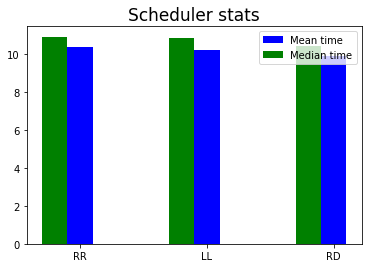

In [159]:
X = np.arange(len(avg_times))
ax = plt.subplot(111)
ax.bar(X, avg_times.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, median_times.values(), width=0.2, color='g', align='center')
ax.legend(('Mean time','Median time'))
plt.xticks(X, avg_times.keys())
plt.title("Scheduler stats", fontsize=17)
plt.savefig('Mean_median_scheduling_algos')
plt.show()